Minicubes Utility notebook

In [1]:
import torch
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.datasets.vision import StandardTransform
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import pandas as pd 
from PIL import Image
import matplotlib.pyplot as plt 
%matplotlib inline 
import json
import os

import SimpleITK as sitk

from Dataset_Utils import BraTS_TrainingDataset
from Dataset_Utils import plot_batch, crop_batch, decrop_batch, split_cube

torch.manual_seed(42)

ModuleNotFoundError: No module named 'Dataset_Utils'

Data Loading

In [2]:
# PATH
DATASET_PATH = '/media/z/Ubuntu-Storage/BT_Segmentation_Project/Task01_BrainTumour/cropped/'

train_data = BraTS_TrainingDataset(DATASET_PATH)

trainloader = torch.utils.data.DataLoader(
    train_data, batch_size=1, shuffle=True, num_workers=0)

train_iter = iter(trainloader)

sample_batch = train_iter.next()
print(sample_batch['image'].shape)
print(sample_batch['label'].shape)

# plot_batch(sample_batch, num_rows=2, height=75)

/media/z/Ubuntu-Storage/BT_Segmentation_Project/Task01_BrainTumour/cropped/imagesTr
/media/z/Ubuntu-Storage/BT_Segmentation_Project/Task01_BrainTumour/cropped/labelsTr
torch.Size([1, 4, 155, 192, 192])
torch.Size([1, 155, 192, 192])


Cube splitting

In [3]:
# Get a minicube batch
sample_batch = train_iter.next()
minicube_batch = split_cube(sample_batch)

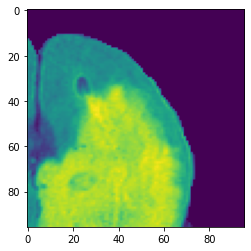

In [4]:
# show cube 1
x = minicube_batch['image'][1, 0, 70, :, :]
plt.imshow(x)

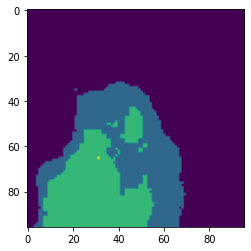

In [5]:
# show label 1
y = minicube_batch['label'][1, 70, :, :]
plt.imshow(y)